Linear Regression - Demo

In [2]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

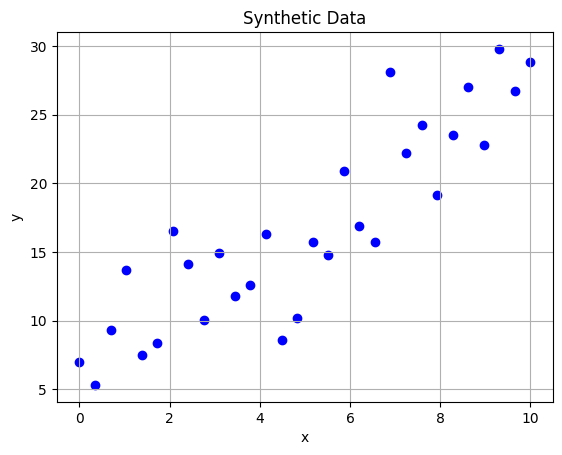

In [3]:
# Generate test linear data with noise
x = np.linspace(0, 10, 30)
y = 2.5 * x + 5 + np.random.randn(30) * 4

# Plot data
plt.scatter(x, y, color='blue')
plt.title('Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


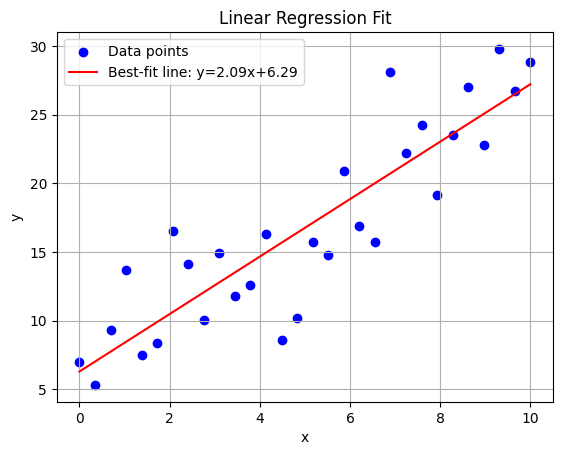

In [4]:
# Fit line using numpy polyfit
w, b = np.polyfit(x, y, 1)
y_pred = w * x + b

plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, y_pred, color='red', label=f'Best-fit line: y={w:.2f}x+{b:.2f}')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


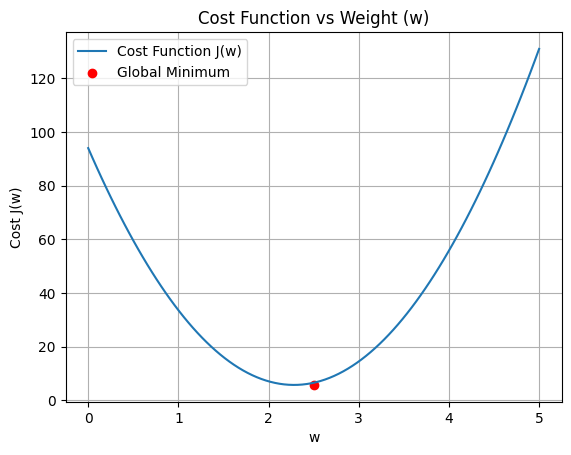

In [5]:
# Cost function J(w) with true bias
true_w, true_b = 2.5, 5
w_values = np.linspace(0, 5, 100)
costs = []

for w_try in w_values:
    y_hat = w_try * x + true_b
    J = np.mean((y_hat - y)**2) / 2
    costs.append(J)

plt.plot(w_values, costs, label='Cost Function J(w)')
plt.scatter([true_w], [min(costs)], color='red', label='Global Minimum')
plt.title('Cost Function vs Weight (w)')
plt.xlabel('w')
plt.ylabel('Cost J(w)')
plt.legend()
plt.grid(True)
plt.show()


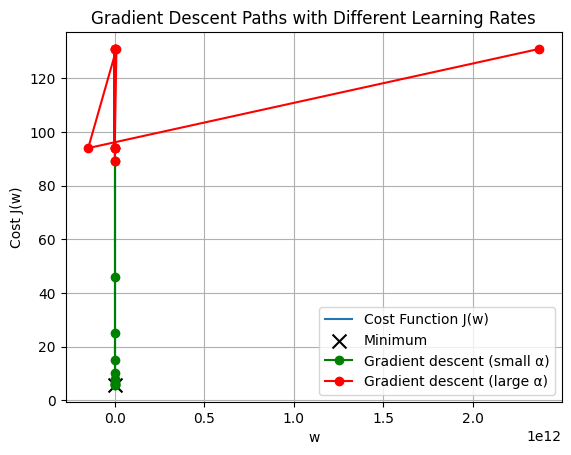

In [6]:
# Learning rates
alpha_small, alpha_large = 0.05, 0.5
w_start = 4.5

# Small alpha path
w_path_small = [w_start]
w_curr = w_start
for _ in range(10):
    grad = np.mean((w_curr * x + true_b - y) * x)
    w_curr = w_curr - alpha_small * grad
    w_path_small.append(w_curr)

# Large alpha path
w_path_large = [w_start]
w_curr = w_start
for _ in range(10):
    grad = np.mean((w_curr * x + true_b - y) * x)
    w_curr = w_curr - alpha_large * grad
    w_path_large.append(w_curr)

# Plot gradient descent paths
plt.plot(w_values, costs, label='Cost Function J(w)')
plt.scatter([true_w], [min(costs)], color='black', marker='x', s=100, label='Minimum')

plt.plot(w_path_small, [np.interp(w, w_values, costs) for w in w_path_small],
         marker='o', color='green', label='Gradient descent (small α)')

plt.plot(w_path_large, [np.interp(w, w_values, costs) for w in w_path_large],
         marker='o', color='red', label='Gradient descent (large α)')

plt.title('Gradient Descent Paths with Different Learning Rates')
plt.xlabel('w')
plt.ylabel('Cost J(w)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
#You can experiment with different learning rates to better understand the concept!